<a href="https://colab.research.google.com/github/Lor3nzoVis3/DeepLearning_ProjectLV_GB/blob/master/TransferLearningV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
"""
@author: LorenzoVisentini
"""

#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
#keras
import keras
from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras.models import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
#inception v3
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input, decode_predictions

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
#Images parameters
img_width = 299
img_height = 299

# train_dir = './source_light/training'
# validation_dir = './source_light/validation' 
train_dir = '/content/drive/My Drive/Deep Learning Project - Image Classification/source_light/training'
validation_dir = '/content/drive/My Drive/Deep Learning Project - Image Classification/source_light/validation' 


In [18]:
#from https://edebrouwer.github.io/deeplearning/carvision/transfer/neural/networks/learning/2017/08/05/TransferLearning.html

#Transfer learning on InceptionV3 model
#use all the layers except for the last fully connected layer (because its 
#specific to the ImageNet competition)
#we will retrain layers with new inputs
pre_trained_model = InceptionV3(input_shape = (img_height, img_width, 3),
                               include_top = False, #exclude last flatten layer
                               weights = 'imagenet' #weights from imageNet
                               ) 

# pre_trained_model.summary() #check V3 structure

In [19]:
n_classes = 3

#transfer learning phase
x = pre_trained_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation= 'relu')(x) #add fully connected layer
x = Dense(n_classes, activation= 'sigmoid')(x)
model = Model(inputs = pre_trained_model.input, outputs = x)

#perchè 280
#freeze the model excepted added layers
for layer in model.layers[:280]:
    layer.trainable = False
for layer in model.layers[280:]:
    layer.trainable = True

model.compile(optimizer = 'Adam',
              loss = 'categorical_crossentropy',  #because we have 3 possible outputs
              metrics = ['accuracy'])

In [20]:
#preprocessing
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                    target_size=(img_height, img_width),
                                                    color_mode="rgb",
                                                    batch_size=256,
                                                    class_mode="categorical",
                                                    shuffle=True,
                                                    seed=42
                                                    )

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator = val_datagen.flow_from_directory(directory=validation_dir,
                                                    target_size=(img_height, img_width),
                                                    color_mode="rgb",
                                                    batch_size=256,
                                                    class_mode="categorical",
                                                    shuffle=True,
                                                    seed=42
                                                    )

Found 7000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [21]:
history = model.fit_generator(generator = train_generator,
                             steps_per_epoch = train_generator.n//train_generator.batch_size,
                             epochs = 4,
                             validation_data = val_generator
                             )


Epoch 1/4


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2 could not be retrieved. It could be because a worker has died.
  UserWarning)


 1/27 [>.............................] - ETA: 33:52 - loss: 1.0741 - accuracy: 0.4219

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1 could not be retrieved. It could be because a worker has died.
  UserWarning)


 2/27 [=>............................] - ETA: 29:20 - loss: 1.4125 - accuracy: 0.4766

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 13 could not be retrieved. It could be because a worker has died.
  UserWarning)


 4/27 [===>..........................] - ETA: 24:04 - loss: 1.2233 - accuracy: 0.4895

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 23 could not be retrieved. It could be because a worker has died.
  UserWarning)


 5/27 [====>.........................] - ETA: 23:04 - loss: 1.1845 - accuracy: 0.4955

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 4 could not be retrieved. It could be because a worker has died.
  UserWarning)


 6/27 [=====>........................] - ETA: 22:30 - loss: 1.1570 - accuracy: 0.4942

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 6 could not be retrieved. It could be because a worker has died.
  UserWarning)


 7/27 [======>.......................] - ETA: 21:33 - loss: 1.1347 - accuracy: 0.5049

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 18 could not be retrieved. It could be because a worker has died.
  UserWarning)


 8/27 [=======>......................] - ETA: 20:41 - loss: 1.1196 - accuracy: 0.5048

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 15 could not be retrieved. It could be because a worker has died.
  UserWarning)


 9/27 [=========>....................] - ETA: 19:42 - loss: 1.1097 - accuracy: 0.5066

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 9 could not be retrieved. It could be because a worker has died.
  UserWarning)


10/27 [==========>...................] - ETA: 18:52 - loss: 1.1018 - accuracy: 0.5113

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 7 could not be retrieved. It could be because a worker has died.
  UserWarning)


11/27 [===========>..................] - ETA: 17:48 - loss: 1.0945 - accuracy: 0.5140

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 21 could not be retrieved. It could be because a worker has died.
  UserWarning)


12/27 [============>.................] - ETA: 16:55 - loss: 1.0872 - accuracy: 0.5121

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 16 could not be retrieved. It could be because a worker has died.
  UserWarning)


13/27 [=============>................] - ETA: 15:54 - loss: 1.0822 - accuracy: 0.5104

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 5 could not be retrieved. It could be because a worker has died.
  UserWarning)


14/27 [==============>...............] - ETA: 14:48 - loss: 1.0800 - accuracy: 0.5126

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 26 could not be retrieved. It could be because a worker has died.
  UserWarning)


15/27 [===============>..............] - ETA: 13:42 - loss: 1.0739 - accuracy: 0.5090

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 8 could not be retrieved. It could be because a worker has died.
  UserWarning)


16/27 [================>.............] - ETA: 12:29 - loss: 1.0697 - accuracy: 0.5053

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 10 could not be retrieved. It could be because a worker has died.
  UserWarning)


17/27 [=================>............] - ETA: 11:27 - loss: 1.0656 - accuracy: 0.5091

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 20 could not be retrieved. It could be because a worker has died.
  UserWarning)


18/27 [===================>..........] - ETA: 10:20 - loss: 1.0628 - accuracy: 0.5110

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 0 could not be retrieved. It could be because a worker has died.
  UserWarning)


19/27 [====================>.........] - ETA: 9:10 - loss: 1.0602 - accuracy: 0.5109 

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 3 could not be retrieved. It could be because a worker has died.
  UserWarning)


20/27 [=====================>........] - ETA: 8:01 - loss: 1.0561 - accuracy: 0.5113

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 25 could not be retrieved. It could be because a worker has died.
  UserWarning)


21/27 [======================>.......] - ETA: 6:54 - loss: 1.0546 - accuracy: 0.5102

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 17 could not be retrieved. It could be because a worker has died.
  UserWarning)


22/27 [=======================>......] - ETA: 5:46 - loss: 1.0521 - accuracy: 0.5084

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 24 could not be retrieved. It could be because a worker has died.
  UserWarning)


23/27 [========================>.....] - ETA: 4:37 - loss: 1.0501 - accuracy: 0.5086

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 14 could not be retrieved. It could be because a worker has died.
  UserWarning)


24/27 [=========================>....] - ETA: 3:27 - loss: 1.0494 - accuracy: 0.5067

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 22 could not be retrieved. It could be because a worker has died.
  UserWarning)


25/27 [==========================>...] - ETA: 2:18 - loss: 1.0479 - accuracy: 0.5075

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 11 could not be retrieved. It could be because a worker has died.
  UserWarning)


26/27 [===========================>..] - ETA: 1:09 - loss: 1.0469 - accuracy: 0.5066

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 12 could not be retrieved. It could be because a worker has died.
  UserWarning)


27/27 [==============================] - 1937s 72s/step - loss: 1.0452 - accuracy: 0.5067 - val_loss: 1.0904 - val_accuracy: 0.5333
Epoch 2/4
27/27 [==============================] - 132s 5s/step - loss: 0.9585 - accuracy: 0.5034 - val_loss: 1.0444 - val_accuracy: 0.5333
Epoch 3/4
27/27 [==============================] - 112s 4s/step - loss: 0.9371 - accuracy: 0.5092 - val_loss: 1.2165 - val_accuracy: 0.5333
Epoch 4/4
27/27 [==============================] - 112s 4s/step - loss: 0.9321 - accuracy: 0.5034 - val_loss: 1.1676 - val_accuracy: 0.5333


In [23]:
import pickle
#save model and history
model.save('/content/drive/My Drive/Deep Learning Project - Image Classification/Models/InceptionV3_batch256epoch5.h5')

with open('/content/drive/My Drive/Deep Learning Project - Image Classification/History/InceptionV3_batch256epoch5.csv', 'wb') as file:
    pickle.dump(history.history, file)


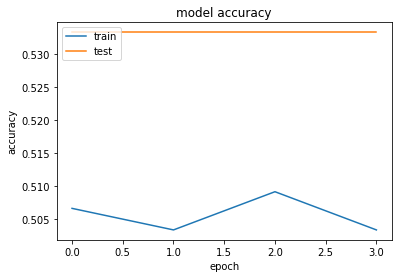

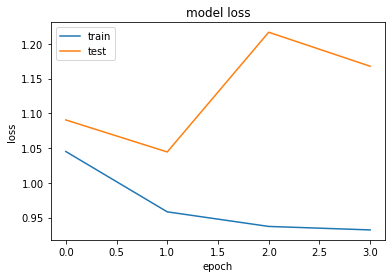

In [24]:
#plot results
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
#evaluation
# https://stackoverflow.com/questions/40564936/keras-what-is-the-difference-between-model-evaluate-generator-and-model-predict
steps = val_generator.n // val_generator.batch_size

accuracy_ontest = model.evaluate_generator(val_generator, steps)
predictions_ontest = model.predict_generator(val_generator, steps)
print(accuracy_ontest)
print(predictions_ontest)

[1.0391627550125122, 0.5330255627632141]
[[1.         1.         0.09372541]
 [1.         1.         0.9999912 ]
 [1.         1.         0.90659326]
 ...
 [1.         1.         0.00873   ]
 [1.         1.         0.01114979]
 [1.         1.         0.8076733 ]]
